# Ablation study on ts_embed
**Does wavenet embedding improves long-term forecasintg?**

> All runs from a sweep named *wavenet_ablation*.  
> All hyperparams are shared through all runs, except for *ts_embed*.

In [42]:
import torch
import seaborn as sns
sns.set_style('darkgrid')
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

from model.model import Transformer_fcst
from tools.infer import InferShortTerm, InferLongTerm
from tools.create_synthetic import create_multi
from tools.preprocess import make_input_target, make_src_tgt
from tools.train import make_loader

In [2]:
# infer config
src_len, tgt_len = 96, 24
project_name = 'transformer_for_time_series_synthetic_data'

# device
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# test data
test_data = create_multi(1000, src_len, tgt_len)
input, target = make_input_target(test_data, src_len, tgt_len)
test_dloader = make_loader(input, target, batch_size=128)

## Top 5 runs using ***conv*** as time series embedding

In [3]:
TS_EMBED = 'conv'
run_names = ['celestial-sweep-10', 'logical-sweep-4', 'deep-sweep-22', 'dry-sweep-12', 'crisp-sweep-2']
conv_logs = dict()

for run_name in run_names:    
    # model (load .pth from checkpoints)
    model = Transformer_fcst(fcst_mode='gauss',
                             seq_len=(src_len, tgt_len),
                             embedding_dim=16,
                             nhead=8,
                             num_layers=(2, 2),
                             device=device,
                             ts_embed=TS_EMBED,
                             pos_embed='fixed').to(device)
    model.load_state_dict(torch.load(f'./checkpoints/synthetic/{project_name}_{run_name}.pth'))
    print(f'Load model from \n project name: {project_name} \n run name: {run_name}')

    # infer object
    infershrot = InferShortTerm(model)
    inferlong = InferLongTerm(model)
    
    # infer
    running_values = [0.0 for _ in range(4)]
    with torch.no_grad():
        for (input_batch, target_batch) in tqdm(test_dloader):
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)
            src, tgt = make_src_tgt(input_batch, src_len, tgt_len)

            short_loss, short_metrics = infershrot.eval((src, tgt), target_batch)
            long_loss, long_metrics = inferlong.eval((src, tgt), target_batch)

            running_values[0] += short_loss.item()
            running_values[1] += short_metrics[0].item()
            running_values[2] += long_loss.item()
            running_values[3] += long_metrics[0].item()
    
    running_values = [x/len(test_dloader) for x in running_values]

    # add to conv_logs
    conv_logs[run_name] = running_values


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: celestial-sweep-10


100%|██████████| 8/8 [00:56<00:00,  7.07s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: logical-sweep-4


100%|██████████| 8/8 [00:56<00:00,  7.02s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: deep-sweep-22


100%|██████████| 8/8 [00:56<00:00,  7.02s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: dry-sweep-12


100%|██████████| 8/8 [00:56<00:00,  7.01s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: crisp-sweep-2


100%|██████████| 8/8 [00:51<00:00,  6.41s/it]


## Top 5 runs using ***wavenet*** as time series embedding

In [9]:
TS_EMBED = 'wavenet'
run_names = ['confused-sweep-5', 'blooming-sweep-9', 'bright-sweep-11', 'dutiful-sweep-21', 'charmed-sweep-3']
wavenet_logs = dict()

for run_name in run_names:    
    # model (load .pth from checkpoints)
    model = Transformer_fcst(fcst_mode='gauss',
                             seq_len=(src_len, tgt_len),
                             embedding_dim=16,
                             nhead=8,
                             num_layers=(2, 2),
                             device=device,
                             ts_embed=TS_EMBED,
                             pos_embed='fixed').to(device)
    model.load_state_dict(torch.load(f'./checkpoints/synthetic/{project_name}_{run_name}.pth'))
    print(f'Load model from \n project name: {project_name} \n run name: {run_name}')

    # infer object
    infershrot = InferShortTerm(model)
    inferlong = InferLongTerm(model)
    
    # infer
    running_values = [0.0 for _ in range(4)]
    with torch.no_grad():
        for (input_batch, target_batch) in tqdm(test_dloader):
            input_batch, target_batch = input_batch.to(device), target_batch.to(device)
            src, tgt = make_src_tgt(input_batch, src_len, tgt_len)

            short_loss, short_metrics = infershrot.eval((src, tgt), target_batch)
            long_loss, long_metrics = inferlong.eval((src, tgt), target_batch)

            running_values[0] += short_loss.item()
            running_values[1] += short_metrics[0].item()
            running_values[2] += long_loss.item()
            running_values[3] += long_metrics[0].item()
    
    running_values = [x/len(test_dloader) for x in running_values]

    # add to wavenet_logs
    wavenet_logs[run_name] = running_values

Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: confused-sweep-5


100%|██████████| 8/8 [00:25<00:00,  3.14s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: blooming-sweep-9


100%|██████████| 8/8 [00:25<00:00,  3.15s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: bright-sweep-11


100%|██████████| 8/8 [00:25<00:00,  3.16s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: dutiful-sweep-21


100%|██████████| 8/8 [00:25<00:00,  3.16s/it]


Load model from 
 project name: transformer_for_time_series_synthetic_data 
 run name: charmed-sweep-3


100%|██████████| 8/8 [00:25<00:00,  3.17s/it]


## Result


In [13]:
# to pd.DataFrame
conv_logs = pd.DataFrame(conv_logs)
wavenet_logs = pd.DataFrame(wavenet_logs)

# name indices
index = ['short_loss', 'short_MAE', 'long_loss', 'long_MAE']
conv_logs.index = index
wavenet_logs.index = index

# append mean
conv_logs['mean'] = conv_logs.mean(axis=1)
wavenet_logs['mean'] = wavenet_logs.mean(axis=1)

In [27]:
conv_logs

,celestial-sweep-10,logical-sweep-4,deep-sweep-22,dry-sweep-12,crisp-sweep-2,mean
short_loss,0.824032,0.859523,1.011466,0.979081,0.970206,0.928861
short_MAE,1.083941,1.104553,1.273589,1.341218,1.292745,1.219209
long_loss,1.654819,1.390918,1.901149,1.410918,2.055250,1.682611
long_MAE,1.734144,1.597514,2.254526,1.810240,2.337876,1.946860


In [28]:
wavenet_logs

,confused-sweep-5,blooming-sweep-9,bright-sweep-11,dutiful-sweep-21,charmed-sweep-3,mean
short_loss,0.885640,0.880714,0.915939,0.914385,1.018161,0.922968
short_MAE,1.114039,1.053063,1.146635,1.162537,1.338194,1.162894
long_loss,1.139584,1.254656,1.529600,1.336998,1.267038,1.305575
long_MAE,1.418247,1.496067,1.801140,1.591621,1.696622,1.600739


<AxesSubplot:title={'center':'Compare MAE'}, ylabel='MAE'>

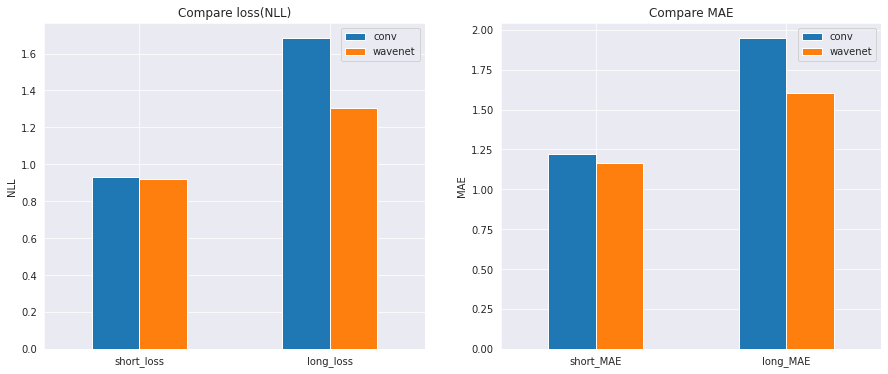

In [53]:
means = pd.concat((conv_logs['mean'], wavenet_logs['mean']), axis=1)
means.columns = ['conv', 'wavenet']

fig, axes = plt.subplots(1,2, figsize=(15,6))
means.loc[['short_loss','long_loss']].plot(kind='bar', rot=0, ax=axes[0], ylabel='NLL', title='Compare loss(NLL)')
means.loc[['short_MAE','long_MAE']].plot(kind='bar', rot=0, ax=axes[1], ylabel='MAE', title='Compare MAE')